### Sample program for Decision Tree  

#### Import libraries  

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#### Parameters  

In [6]:
csv_in = '../ai-05/ai-05/iris.csv'

import sys
my_libs_dir = '../'
if not my_libs_dir in sys.path:
    sys.path.append(my_libs_dir)  # add the path to my_lib directory 

# The following lines are needed to auto-reload my library file
# Without these lines, my library file is read only once and
# modifications of my library file are not reflected.
%load_ext autoreload
%autoreload 1
%aimport my_libs.svm_tools
# import from my library file
from my_libs.svm_tools import plot_classification_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Read CSV file  

In [7]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Extract data  

In [8]:
X= df.loc[:, 'petal_len':'petal_width']
y = df['class']
display(X.head())
print(y.head())

,petal_len,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object


In [9]:
y = y.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


#### Building Decision Tree  

In [10]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X, y)  

DecisionTreeClassifier(random_state=0)

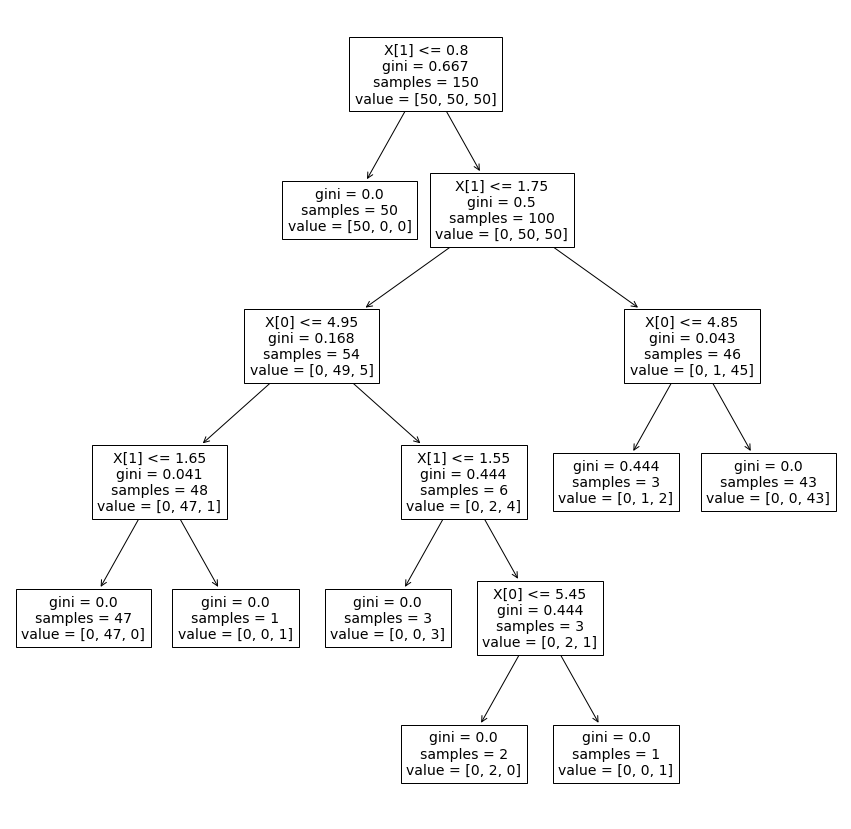

In [11]:
plt.figure(figsize=(15,15))
plot_tree(dtree)
plt.show()

#### Scatter plot of classification  

../my_libs/svm_tools.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


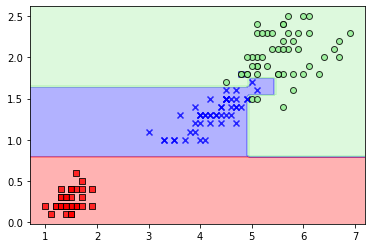

In [12]:
plot_classification_results(X.values, y.values, dtree)